# Zhengzhou City soundings from Henan flood 7-20 to 7-21, 2021

In [1]:
import scipy.io as sp # for Matlab reading
import numpy as np
import matplotlib.pyplot as plt
import metpy
import metpy.calc as mpcalc

In [2]:
!ls /Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data

up_2021071700.mat up_2021071812.mat up_2021072000.mat up_2021072112.mat
up_2021071712.mat up_2021071900.mat up_2021072012.mat up_2021072200.mat
up_2021071800.mat up_2021071912.mat up_2021072100.mat up_2021072212.mat


In [3]:
mat = sp.loadmat("/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071700.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Heigh_Alti', 'Heigh_WIN_D', 'Heigh_WIN_S', 'PRS_DPT', 'PRS_HWC', 'PRS_TEM', 'PRS_WIN_D', 'PRS_WIN_S'])

In [4]:
# Extract troposphere 0:-80
Td = mat.get('PRS_DPT')[0:,0] *metpy.units.units('degC')
T = mat.get('PRS_TEM')[0:,0] *metpy.units.units('degC')
p = mat.get('PRS_HWC')[0:,0] *metpy.units.units('hPa')

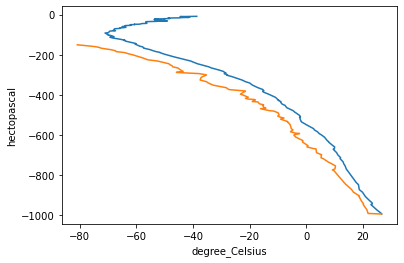

In [5]:
plt.plot(T,-p); plt.plot(Td,-p)

/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071700.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071712.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071800.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071812.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071900.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071912.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072000.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072012.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072100.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072112.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072200.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072212.mat


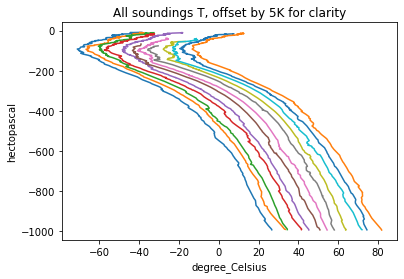

In [9]:
# Loop over files, making T(p) plots 

import glob

for i,file in enumerate(glob.glob('/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/*.mat')): 
    print(file)
    mat = sp.loadmat(file)
    Td=mat.get('PRS_DPT')[0:,0] *metpy.units.units('degC') 
    T =mat.get('PRS_TEM')[0:,0] *metpy.units.units('degC')
    p =mat.get('PRS_HWC')[0:,0] *metpy.units.units('hPa')
    plt.plot(T + (i*5)*metpy.units.units('delta_degC') ,-p); #plt.plot(Td,-p)
    plt.title('All soundings T, offset by 5K for clarity')

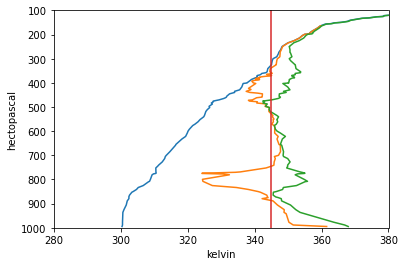

In [10]:
th = mpcalc.potential_temperature(p,T)
the =  mpcalc.equivalent_potential_temperature(p,T,Td)
thesat=mpcalc.equivalent_potential_temperature(p,T,T) # saturation value at T 

# nonsensical quantity, but easy to construct 
thesat2=mpcalc.equivalent_potential_temperature(p,Td,Td) # saturation value at Td  

plt.plot(th,p); plt.plot(the,p); plt.plot(thesat,p); plt.xlim([280,380]); plt.ylim([1000,100])
#plt.plot(thesat2,p)
plt.plot([345,345],[1000,100])

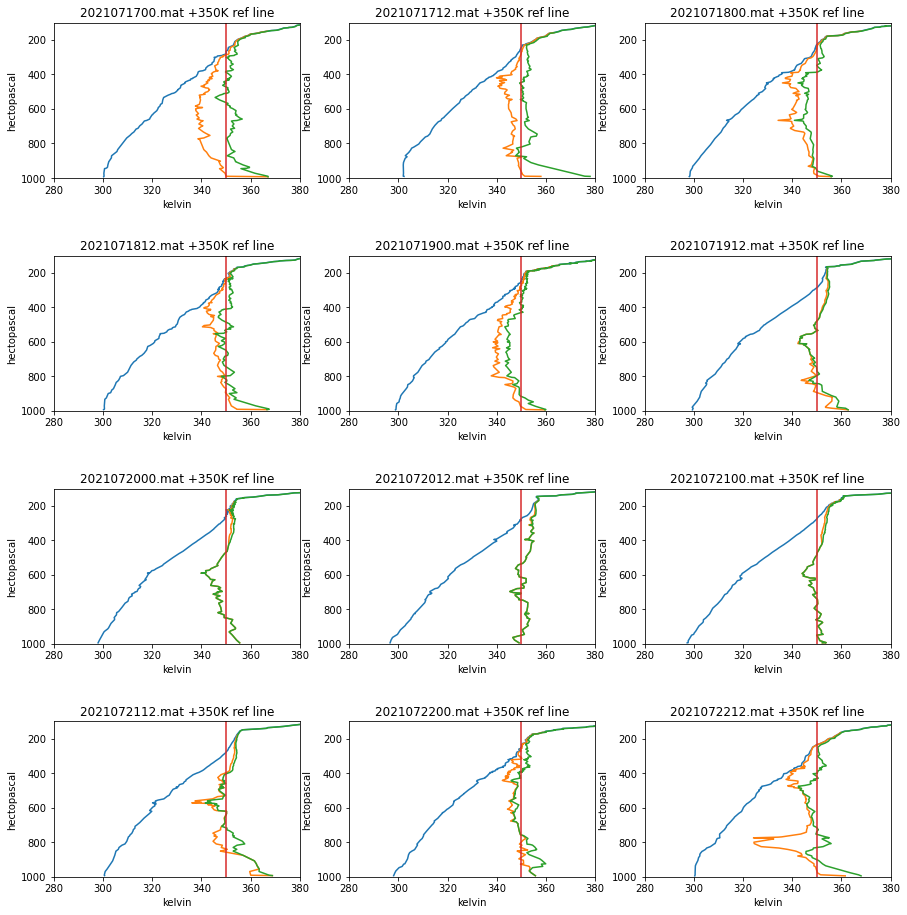

In [11]:
# Loop over them all

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

for i,file in enumerate(glob.glob('/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/*.mat')): 
    #print(file)
    
    mat = sp.loadmat(file)
    Td=mat.get('PRS_DPT')[0:,0]*metpy.units.units('degC')
    T =mat.get('PRS_TEM')[0:,0]*metpy.units.units('degC')
    p =mat.get('PRS_HWC')[0:,0]*metpy.units.units('hPa')
    th = mpcalc.potential_temperature(p,T)
    the =  mpcalc.equivalent_potential_temperature(p,T,Td)
    thesat=mpcalc.equivalent_potential_temperature(p,T,T) # saturation value
    
    ax = plt.subplot(5, 3, i+1) # 5x3 array, filled in order
    plt.plot(th,p); plt.plot(the,p); plt.plot(thesat,p); plt.xlim([280,380]); plt.ylim([1000,100])
    plt.plot([350,350],[1000,100])    
    plt.title(file[66:]+' +350K ref line')
    
    #print(p[ (abs(p - 925.0*metpy.units.units('hPa'))).argmin() ])

In [12]:
p

Magnitude,[994.6 994.6 994.6 994.6 988.4 976.9 941.7 936.2 925.0 905.7 888.6 879.4 875.0 872.2 864.9 852.7 850.0 841.4 833.2 825.2 809.2 807.6 799.4 780.6 777.2 776.7 775.1 774.0 772.8 770.3 768.7 752.3 744.6 740.9 727.2 713.5 704.9 700.0 684.9 658.1 655.0 632.5 621.8 607.5 600.0 592.2 584.5 576.8 571.4 561.2 551.8 550.0 540.5 535.1 518.4 510.6 502.2 500.0 497.3 487.5 483.5 478.4 475.5 472.3 470.5 464.7 461.6 459.0 455.6 445.6 445.6 442.6 439.7 435.2 428.9 427.4 422.9 417.0 402.7 400.6 400.0 392.8 389.5 388.5 386.3 383.3 381.2 379.8 378.6 378.3 376.8 374.7 372.8 371.6 369.4 367.1 365.2 361.0 358.0 354.3 341.5 341.1 324.8 324.0 308.1 300.0 298.5 292.0 276.8 274.4 263.4 250.1 250.0 249.2 236.9 234.6 225.5 214.6 203.9 200.0 198.8 197.6 195.7 193.2 185.5 182.8 173.0 164.6 163.8 156.7 154.9 151.9 150.0 149.8 146.1 145.7 141.0 132.8 131.1 126.8 126.7 125.3 122.0 118.1 118.1 118.1 109.3 105.8 100.0 91.9 85.5 82.0 77.2 73.9 70.0 69.1 66.9 65.5 65.5 62.5 61.1 59.6 55.4 51.7 50.0 49.0 48.8 47.9 46.9 43.2 43.1 42.4 40.4 40.4 40.0 38.6 38.1 36.8 35.4 34.2 33.7 31.7 30.0 29.8 29.6 28.3 27.9 27.2 26.3 26.1 24.7 23.4 22.9 22.5 21.6 20.6 20.4 20.0 17.8 17.7 16.5 16.2 15.4 15.0 14.9 14.9 14.9 14.3 14.1 13.3 12.6 12.6 12.6]
Units,hectopascal


# Since they all have 925 mb, let's plot dZ_hypso up from there

## Interpolate to 25 hPa common grid for a time-height section

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


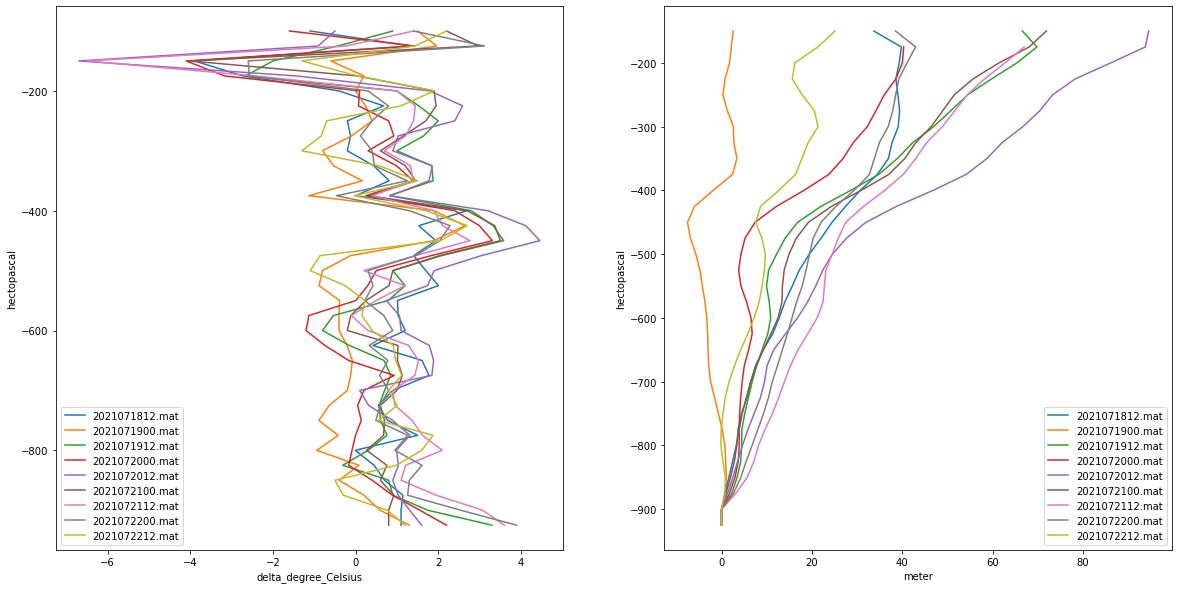

In [16]:
# Loop over them all
import matplotlib as mpl

f, axarr = plt.subplots(1,2, figsize=[20,10])

for itime,file in enumerate(glob.glob('/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_202107*.mat')): 
    #print(file)
    
    mat = sp.loadmat(file)
    Td=mat.get('PRS_DPT')[0:,0]*metpy.units.units('degC')
    T =mat.get('PRS_TEM')[0:,0]*metpy.units.units('degC')
    p =mat.get('PRS_HWC')[0:,0]*metpy.units.units('hPa')
    mixr = mpcalc.mixing_ratio_from_specific_humidity(mpcalc.specific_humidity_from_dewpoint(p,Td))

    # Calculate thickness above 925 hPa surface. 
    # find index where p is closest to 925 (equal, in all these files) 
    i925 =(abs(p - 925.0*metpy.units.units('hPa'))).argmin() 
    
    # Interpolate T and dZ to every 25mb so we can plot differences from first sounding
    #100 to 925, there are 34 values, and then reverse the array
    p25 = (np.linspace(100,925,34))[::-1] *metpy.units.units('hPa') #925 to 100
 
    # interp has to be monotinically increasing, so use negative of p as x for y(x) 
    T25 = np.interp(-p25, -p[i925+1:], T[i925+1:])
    m25 = np.interp(-p25, -p[i925+1:], mixr[i925+1:])
    
    # Calculate dZ from 25mb interpolated T,mixing ratio
    dZ25 = []
    for i in range(len(p25)): 
        dZ25.append( mpcalc.thickness_hydrostatic(p25[0:i], T25[0:i], m25[0:i]) )
    dZ25 = metpy.units.units.Quantity.from_list(dZ25)

    # Plots (subtracting first time as a reference) 
    # color cycling sucks! 
    # N = 10
    # mpl.rcParams["axes.prop_cycle"] = get_cycle("jet", N)

    if itime==0: 
        Zref = dZ25
        Tref = T25
    if itime>0: 
        axarr[1].plot(dZ25-Zref,-p25, label=file[66:])
        axarr[0].plot(T25 -Tref,-p25, label=file[66:])
    axarr[0].legend()
    axarr[1].legend()